# What's going on with conserved motifs? 

- scatter plot max - log10 p value motif vs max(or median) conservation score in search region 
- see if different classes
- add an occupancy dimension? 

If I keep going with this: 
- pick 1 TF with more occupancy
- get from Haiwang: D. virilis genome, 1-1 orthologs, gene models

In [28]:
import pandas as pd
import seaborn as sb
import numpy as np
import pybedtools
%matplotlib inline

# Make necessary intersected files
This is really memory intensive so kernel always seems to die when I do it in the notebook. 
- get phastcons for just the region of interest by intersect w bed file containing introns and 1 kb upstream
- get gene information

```
bedtools intersect -a dm6_phastcons.bed -b ../dm6_intron_sloptranscript.bed > phastcons_in_region

bedtools intersect -a ../chip/dmel6.12.genes.bed -b phastcons_in_region -wb > phastcons_in_region_wgene

```
trimmed the wanted columns into new file "2nd_wgenephastconsinregion.bed" and then did: 
```
bedtools intersect -a tf_merge.bed -b 2nd_wgenephastconsinregion.bed -wo > wmotif_gene_phastcons_in_region
```
to get motif information


In [2]:
df = pd.read_table('../output/motif/wmotif_gene_phastcons_in_region', header=None)[[0,1,2,3,4,5,7,8,9,10]]

In [3]:
df.columns = ['chrom','start','end','pval','motifsymbol','motiffbgn','p_start','p_end','gene','phastcons']

In [4]:
df['logp'] = - np.log10(df.pval)

In [5]:
df.head()

,chrom,start,end,pval,motifsymbol,motiffbgn,p_start,p_end,gene,phastcons,logp
0,chr2L,17019,17026,0.000036,br-Z1,.,17019,17020,FBgn0002121,0.007,4.441291
1,chr2L,17019,17026,0.000036,br-Z1,.,17020,17021,FBgn0002121,0.006,4.441291
2,chr2L,17019,17026,0.000036,br-Z1,.,17021,17022,FBgn0002121,0.005,4.441291
3,chr2L,17019,17026,0.000036,br-Z1,.,17022,17023,FBgn0002121,0.002,4.441291
4,chr2L,17019,17026,0.000036,br-Z1,.,17023,17024,FBgn0002121,0.000,4.441291


Need: 
- max -log10 pvalue per gene
- max conservation score per gene

In [6]:
maxpval = df.groupby(['gene']).logp.agg('max')

In [34]:
maxcons = df.groupby(['gene']).phastcons.agg('median')

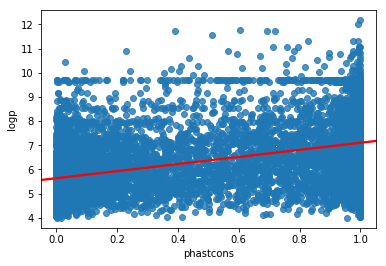

In [39]:
ax = sb.regplot(x=maxcons, y=maxpval, line_kws={'color': 'r'})

In [9]:
motif = df[['chrom','start','end','pval','motifsymbol','motiffbgn','gene']]
motif.drop_duplicates(inplace=True)

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
motifsum = motif.groupby(['gene']).pval.agg('count')

In [25]:
summedcols = motifsum.reset_index()

In [19]:
df2 = df.merge(summedcols, how='left', on=['gene'])

In [26]:
motifhits = df2.groupby(['gene']).pval_y.agg('median')

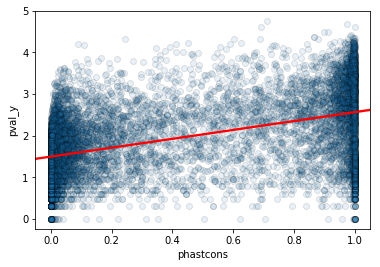

In [43]:
ax = sb.regplot(x=maxcons, y=np.log10(motifhits), line_kws={'color': 'r'}, scatter_kws={'alpha': .1, 'edgecolor': 'k'})

## Check ortholog occupancy for row

Based on my current binary TF ChIP matrix, row has the most occupancy. 

D.virilis 1-1 orthologs: /data/Oliverlab/data/orthologs/flyBase_orthoDB_one2one/dvir.concise.one2one

new annotation: /data/Oliverlab/data/annotation/

In [33]:
dvirorthologs = pd.read_table('/data/Oliverlab/data/orthologs/flyBase_orthoDB_one2one/dvir.concise.one2one',
                             header=None, names=['Dmel','Symbol','Dvir'])

In [34]:
dvirorthologs.head()

,Dmel,Symbol,Dvir
0,FBgn0025571,SF1,FBgn0283420
1,FBgn0085468,ND-MWFE,FBgn0283412
2,FBgn0001253,ImpE1,FBgn0283406
3,FBgn0050022,CG30022,FBgn0283403
4,FBgn0037365,CG2104,FBgn0283394


In [35]:
dvirorthologs[dvirorthologs.Dmel == 'FBgn0033998']

,Dmel,Symbol,Dvir
3392,FBgn0033998,row,FBgn0207753
